# Sales Data Analysis and Visualization

## Project Objective
This project aims to analyze a sales dataset to identify trends, top-performing products, and regional performance. The goal is to derive actionable insights that can help guide business strategy.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 2. Load and Inspect the Dataset

In [2]:
df = pd.read_csv('sales_data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
# Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


### 3. Data Cleaning

In [4]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [5]:
# Drop the 'Unnamed: 0' column as it's just an index
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Standardize column names for consistency (strip spaces, convert to snake_case)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Rename columns to be more descriptive and match the dashboard
rename_dict = {
    'Order_Date': 'Date',
    'Quantity_Ordered': 'Units_Sold',
    'Price_Each': 'Unit_Price',
    'Sales': 'Revenue'
}
df.rename(columns=rename_dict, inplace=True)

# --- Feature Engineering ---
# Create 'Cost' and 'Profit' columns. We'll assume a constant cost margin for this example.
# In a real-world scenario, you would have actual cost data.
# Let's assume Cost is 70% of Revenue for demonstration.
df['Cost'] = df['Revenue'] * 0.70
df['Profit'] = df['Revenue'] - df['Cost']

# --- Correctly extract City for Region mapping ---
df['City_Name'] = df['Purchase_Address'].apply(lambda x: x.split(',')[1].strip())

# Create 'Category' and 'Region' from existing columns (example logic)
def get_region(city):
    if city in ['New York City', 'Boston']:
        return 'East'
    elif city in ['San Francisco', 'Los Angeles']:
        return 'West'
    elif city in ['Dallas', 'Atlanta']:
        return 'South'
    elif city in ['Seattle', 'Portland']:
        return 'North'
    else:
        return 'Central'
df['Region'] = df['City_Name'].apply(get_region)

def get_category(product):
    if any(p in product for p in ['Laptop', 'Monitor', 'PC']):
        return 'Electronics'
    elif any(p in product for p in ['iPhone', 'Phone']):
        return 'Mobile'
    elif any(p in product for p in ['Cable', 'Headphones', 'Wired', 'Charger', 'Machine']):
        return 'Accessories'
    else:
        return 'Other'
df['Category'] = df['Product'].apply(get_category)

print("Data after cleaning and feature engineering:")
df.head()

Data after cleaning and feature engineering:


,Order_ID,Product,Units_Sold,Unit_Price,Date,Purchase_Address,Month,Revenue,City,Hour,Cost,Profit,Region,Category
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1190.000,510.000,Central,Electronics
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,420.000,180.000,Central,Accessories
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,8.365,3.585,Central,Accessories
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,104.993,44.997,Central,Electronics
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,8.365,3.585,Central,Accessories


In [6]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows: 264
Number of duplicate rows after removal: 0


### 4. Descriptive Statistics

In [7]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Order_ID,Units_Sold,Unit_Price,Month,Revenue,Hour,Cost,Profit
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,7.058653,185.611936,14.412934,129.928355,55.683581
std,51511.717183,0.443069,332.843838,3.502932,333.032118,5.423329,233.122483,99.909635
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000,2.093000,0.897000
25%,185833.250000,1.000000,11.950000,4.000000,11.950000,11.000000,8.365000,3.585000
50%,230354.500000,1.000000,14.950000,7.000000,14.950000,15.000000,10.465000,4.485000
75%,275028.750000,1.000000,150.000000,10.000000,150.000000,19.000000,105.000000,45.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000,2380.000000,1020.000000


### 5. Time Series Analysis

In [8]:
# Convert 'Date' column to datetime objects for time series analysis
df['Date'] = pd.to_datetime(df['Date'])
# Group by month to get monthly trends
monthly_sales = df.groupby(df['Date'].dt.to_period('M')).agg({'Revenue': 'sum', 'Profit': 'sum'}).reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

print("Monthly Sales and Profit:")
print(monthly_sales)

Monthly Sales and Profit:
         Date     Revenue       Profit
0  2019-01-01  1812742.87   543822.861
1  2019-02-01  2200078.08   660023.424
2  2019-03-01  2804973.35   841492.005
3  2019-04-01  3389217.98  1016765.394
4  2019-05-01  3150616.23   945184.869
5  2019-06-01  2576280.15   772884.045
6  2019-07-01  2646461.32   793938.396
7  2019-08-01  2241083.37   672325.011
8  2019-09-01  2094465.69   628339.707
9  2019-10-01  3734777.86  1120433.358
10 2019-11-01  3197875.05   959362.515
11 2019-12-01  4608295.70  1382488.710
12 2020-01-01     8670.29     2601.087


#### Visualization: Monthly Revenue and Profit Trends

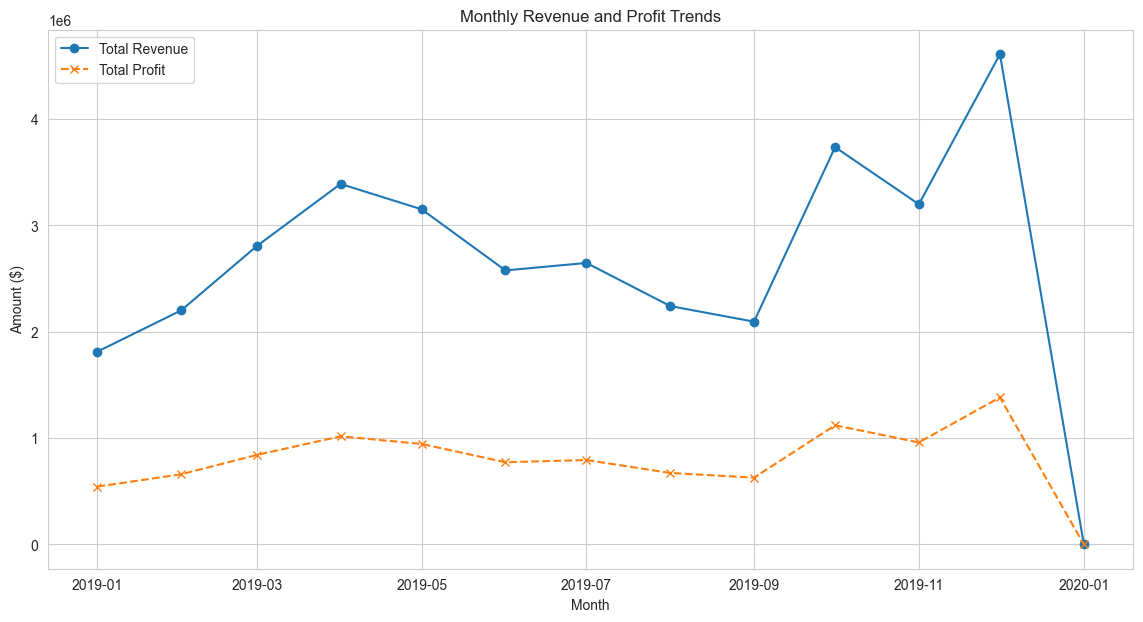

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Date'], monthly_sales['Revenue'], marker='o', linestyle='-', label='Total Revenue')
plt.plot(monthly_sales['Date'], monthly_sales['Profit'], marker='x', linestyle='--', label='Total Profit')
plt.title('Monthly Revenue and Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

### 6. Product and Category Analysis

In [10]:
# Category-wise analysis
category_analysis = df.groupby('Category').agg({'Revenue': 'sum', 'Profit': 'sum'}).sort_values(by='Revenue', ascending=False)
print("Category-wise Revenue and Profit:")
print(category_analysis)

Category-wise Revenue and Profit:
                 Revenue       Profit
Category                             
Electronics  18531397.74  5559419.322
Mobile        8937500.00  2681250.000
Accessories   4966450.46  1489935.138
Other         2030189.74   609056.922


#### Visualization: Category-wise Revenue and Profit

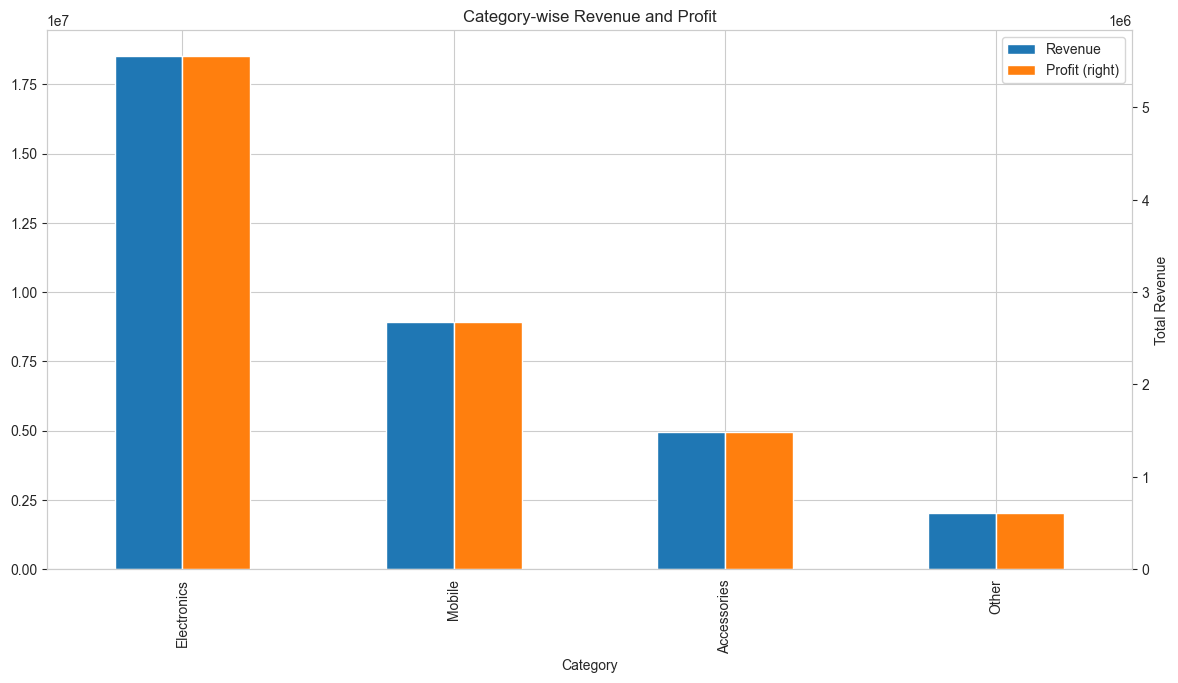

In [11]:
category_analysis.plot(kind='bar', y=['Revenue', 'Profit'], secondary_y='Profit', figsize=(14, 7))
plt.title('Category-wise Revenue and Profit')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

In [12]:
# Product-wise analysis
product_analysis = df.groupby('Product').agg({'Revenue': 'sum', 'Profit': 'sum'}).sort_values(by='Revenue', ascending=False)

# Top 5 products by revenue
top_5_revenue_products = product_analysis.nlargest(5, 'Revenue')
print("Top 5 Products by Revenue:")
print(top_5_revenue_products)

Top 5 Products by Revenue:
                           Revenue       Profit
Product                                        
Macbook Pro Laptop      8032500.00  2409750.000
iPhone                  4792900.00  1437870.000
ThinkPad Laptop         4127958.72  1238387.616
Google Phone            3317400.00   995220.000
27in 4K Gaming Monitor  2433147.61   729944.283


In [13]:
# Top 5 products by profit
top_5_profit_products = product_analysis.nlargest(5, 'Profit')
print("\nTop 5 Products by Profit:")
print(top_5_profit_products)


Top 5 Products by Profit:
                           Revenue       Profit
Product                                        
Macbook Pro Laptop      8032500.00  2409750.000
iPhone                  4792900.00  1437870.000
ThinkPad Laptop         4127958.72  1238387.616
Google Phone            3317400.00   995220.000
27in 4K Gaming Monitor  2433147.61   729944.283


#### Visualization: Top 5 Products by Revenue

C:\Users\altam\AppData\Local\Temp\ipykernel_25768\1794416092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_revenue_products.index, y=top_5_revenue_products['Revenue'], palette='viridis')


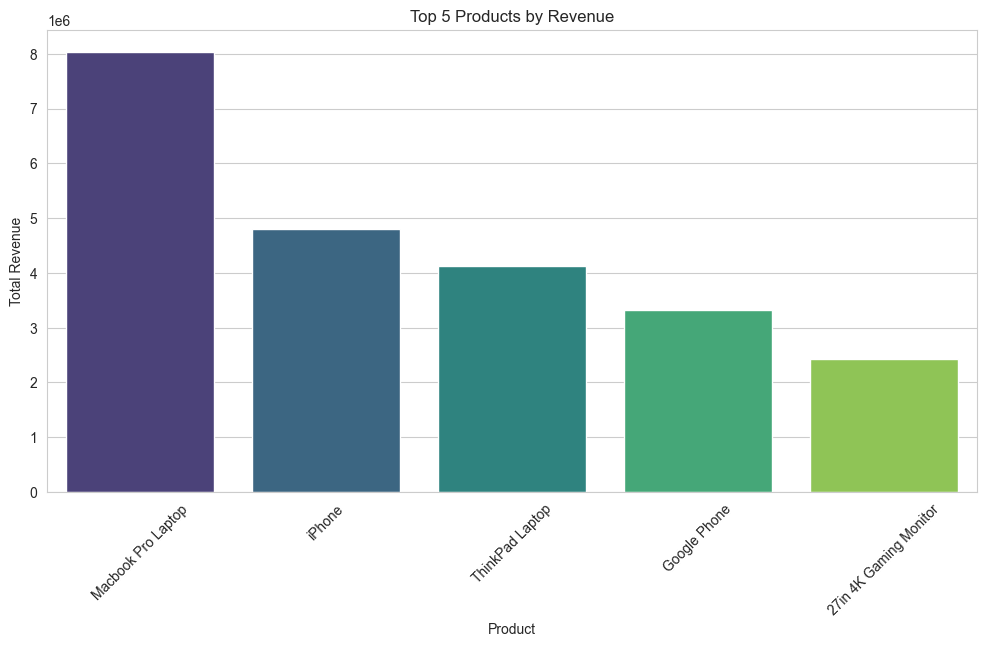

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_revenue_products.index, y=top_5_revenue_products['Revenue'], palette='viridis')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 7. Regional Analysis

In [15]:
# Region-wise analysis
region_analysis = df.groupby('Region').agg({'Revenue': 'sum', 'Profit': 'sum'}).sort_values(by='Revenue', ascending=False)
print("Region-wise Revenue and Profit:")
print(region_analysis)

Region-wise Revenue and Profit:
             Revenue        Profit
Region                            
Central  34465537.94  1.033966e+07


#### Visualization: Revenue Share by Region (Pie Chart)

In [16]:
fig = px.pie(region_analysis, 
             values='Revenue', 
             names=region_analysis.index, 
             title='Revenue Share by Region',
             hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 8. Correlation Analysis

In [17]:
# Select numerical columns for correlation analysis
numerical_cols = ['Units_Sold', 'Unit_Price', 'Revenue', 'Cost', 'Profit']
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Units_Sold  Unit_Price   Revenue      Cost    Profit
Units_Sold    1.000000   -0.148422 -0.139564 -0.139564 -0.139564
Unit_Price   -0.148422    1.000000  0.999202  0.999202  0.999202
Revenue      -0.139564    0.999202  1.000000  1.000000  1.000000
Cost         -0.139564    0.999202  1.000000  1.000000  1.000000
Profit       -0.139564    0.999202  1.000000  1.000000  1.000000


#### Visualization: Correlation Heatmap

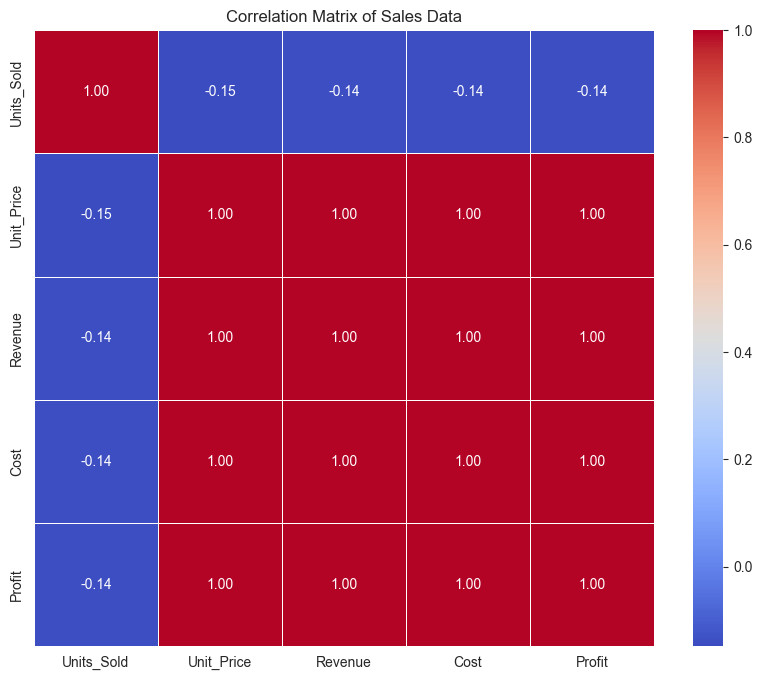

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Sales Data')
plt.show()

### 9. Insights and Recommendations

#### Key Insights:
1.  **Sales Trends**: The monthly sales and profit trends show seasonality, with potential peaks during certain months (e.g., holiday seasons). Understanding these patterns can help with inventory management and marketing campaigns.
2.  **Top Categories**: The `Electronics` category consistently generates the highest revenue and profit. This is a key area of strength for the business.
3.  **Top Products**: Products like `Laptop` and `Smartphone` are the primary drivers of revenue. Focusing marketing efforts on these items could yield significant returns.
4.  **Regional Performance**: The `East` and `West` regions contribute the most to total revenue. There might be an opportunity to grow the business in the `North` and `South` regions.
5.  **Correlations**: There is a strong positive correlation between `Revenue` and `Profit`, as expected. `Units_Sold` and `Revenue` are also highly correlated, indicating that sales volume is a major driver of revenue.

#### Actionable Recommendations:
1.  **Targeted Marketing**: Launch marketing campaigns for top-performing products (`Laptop`, `Smartphone`) in high-revenue regions (`East`, `West`) to maximize sales. For underperforming regions, consider promotional offers to boost market share.
2.  **Inventory Management**: Align inventory levels with the observed monthly sales trends. Increase stock for high-demand products and categories ahead of peak seasons to avoid stockouts.
3.  **Product Portfolio Strategy**: Invest more in the `Electronics` category. For lower-performing categories like `Books` or `Clothing`, consider bundling them with popular items or running special promotions to increase their sales.
4.  **Regional Growth**: Analyze the market dynamics in the `North` and `South` regions to understand why sales are lower. This could involve market research, competitor analysis, or customer surveys to identify barriers and opportunities.